## Análisis Exploratorio de Datos (EDA) - Titanic (Kaggle)

Dataset: https://www.kaggle.com/competitions/titanic/data

### Objetivos:
1. Analizar la calidad de los datos, detectar valores faltantes y posibles outliers.
2. Realizar visualizaciones para comprender la distribución de las variables.
3. Realizar gráficos comparativos (por ejemplo, supervivencia según clase, sexo y edad).
4. Analizar si algunas características influyen más que otras en la supervivencia.
5. Determinar si el dataset está balanceado respecto a la variable objetivo (Survived).

In [63]:
#%pip install pandas numpy matplotlib seaborn scipy   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_theme(style="darkgrid")

Carga de datos

In [64]:
# Carga del dataset de entrenamiento
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Análisis de la calidad de los datos
* Dimensiones del dataset
* Tipos de datos
* Estadísticos descriptivos básicos
* Valores faltantes

Dimensiones

In [65]:
# Dimensiones del dataset
print("Dimensiones del conjunto de datos (filas, columnas):", df.shape)

Dimensiones del conjunto de datos (filas, columnas): (891, 12)


Tipos de datos

In [66]:
# Información general (tipos de datos, nulos)
print("\nInformación del DataFrame:\n")
df.info()


Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Estadísticos descriptivos básicos


In [67]:
# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas descriptivas (numéricas):")
df.describe()


Estadísticas descriptivas (numéricas):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Histogramas de variables numéricas

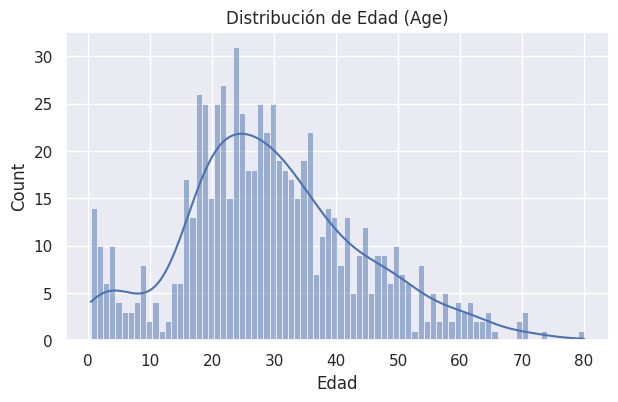

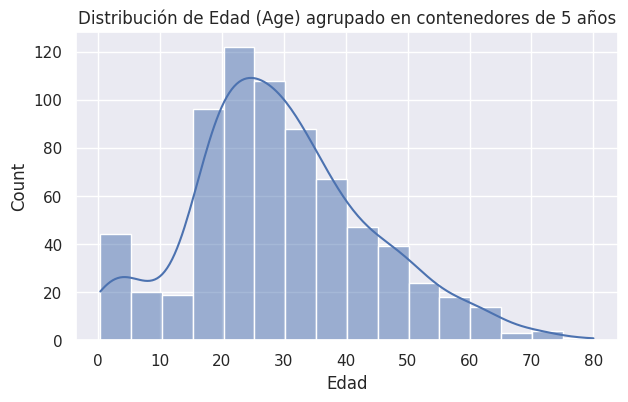

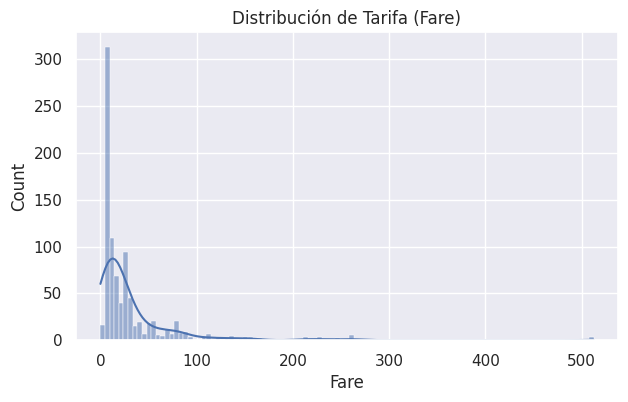

In [68]:
# Histograma de Age
plt.figure(figsize=(7,4))
sns.histplot(df["Age"].dropna(), kde=True, bins=80)
plt.title("Distribución de Edad (Age)")
plt.xlabel("Edad")
plt.show()

# Histograma de Age en menos contenedores
plt.figure(figsize=(7,4))
sns.histplot(df["Age"].dropna(), kde=True, bins=16)
plt.title("Distribución de Edad (Age) agrupado en contenedores de 5 años")
plt.xlabel("Edad")
plt.show()

# Histogramas de Fare
plt.figure(figsize=(7,4))
sns.histplot(df["Fare"], kde=True, bins='fd')
plt.title("Distribución de Tarifa (Fare)")
plt.xlabel("Fare")
plt.show()

Gráfico de barras de variables categóricas (discretas)

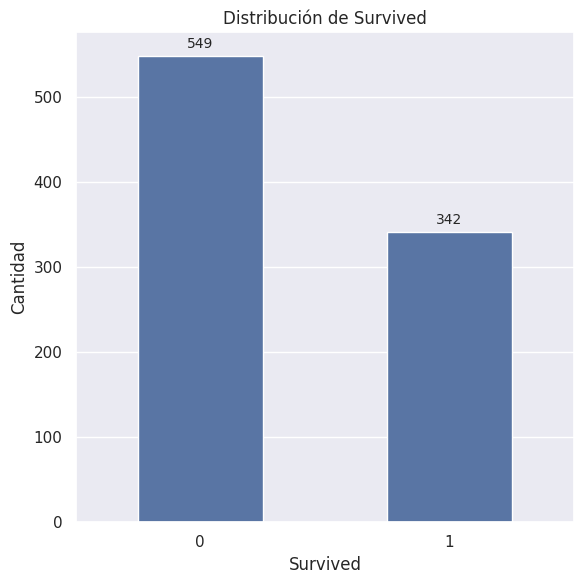

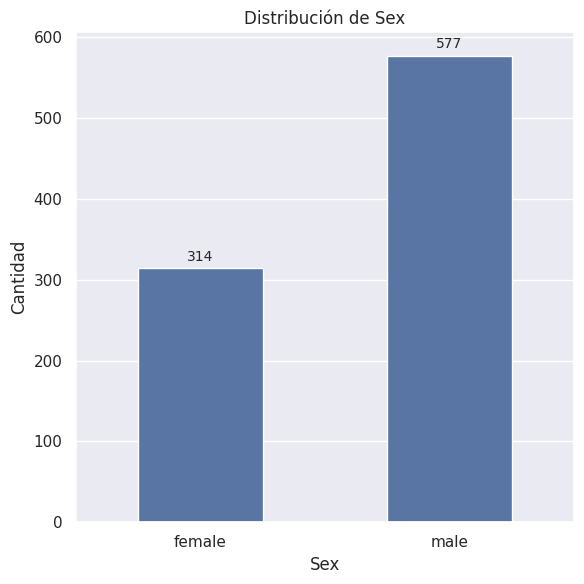

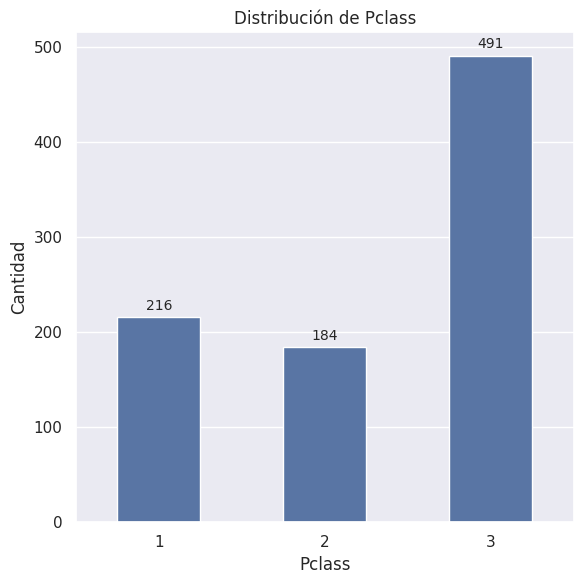

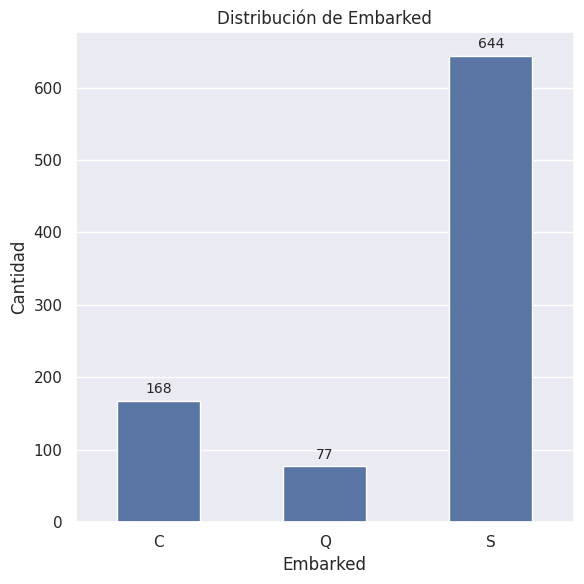

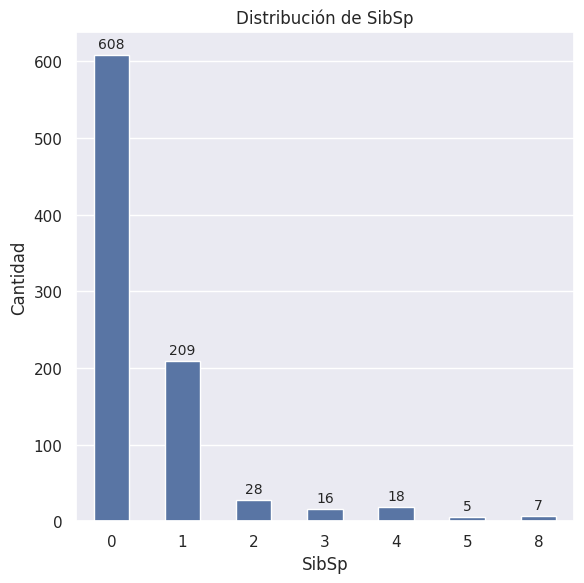

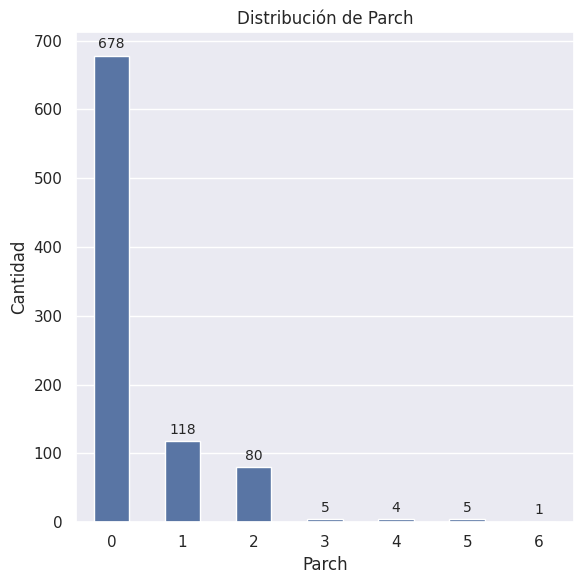

In [69]:
def compute_counts(frame, column):
    counts = (
        frame[column]
        .value_counts()
        .sort_index()
        .rename_axis(column)
        .reset_index(name="Cantidad")
    )
    return counts

def plot_counts(counts, column):
    plt.figure(figsize=(6, 6))
    ax = sns.barplot(data=counts, x=column, y="Cantidad", width=0.5)
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=10)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Cantidad")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_cat_columns(frame, columns):
    for column in columns:
        counts = compute_counts(frame, column)
        plot_counts(counts, column)

cat_cols = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
plot_cat_columns(df, cat_cols)


Datos faltantes

In [70]:
# Funciones utilizadas en datos faltantes

# Calculo de datos faltantes
def missing_values(df: pd.DataFrame) -> pd.DataFrame:

    return df.isna().sum().sort_values(ascending=False)


# Resumen de datos faltantes
def summarize_missing(df: pd.DataFrame) -> pd.DataFrame:

    missing_values = df.isnull().sum()
    missing_percentage = missing_values.div(len(df)).mul(100)

    summary = pd.DataFrame(
        {
            "Faltantes": missing_values,
            "Porcentaje": missing_percentage,
        }
    ).sort_values("Porcentaje", ascending=False)

    return summary[summary["Faltantes"] > 0]

# Visualización de los datos
def plot_missing_values(df, title="Cantidad de valores faltantes por columna"):
    plt.figure(figsize=(8, 6))
    
    ax = sns.barplot(
        x=df.index,
        y=df.values,
    )
    
    plt.title(title)
    plt.ylabel("Cantidad de valores nulos")
    plt.xlabel("Columnas")
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Etiquetas de valor sobre cada barra
    for container in ax.containers:
        ax.bar_label(
            container,
            padding=3,
            fontsize=10
            )

    plt.show()

Datos faltantes en el dataset

          Faltantes  Porcentaje
Cabin           687   77.104377
Age             177   19.865320
Embarked          2    0.224467


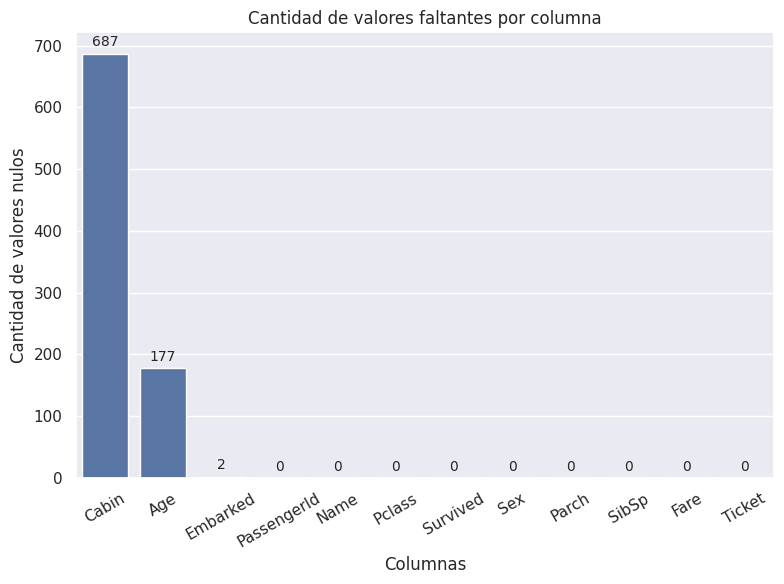

In [71]:
# Resumen de datos faltantes por columna
sumarized_missing_data = summarize_missing(df)

print("Datos faltantes en el dataset\n")
print(sumarized_missing_data)

# Gráfico de faltantes por columna
missing_data = missing_values(df)

plot_missing_values(missing_data)

Detección de Outliers

              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


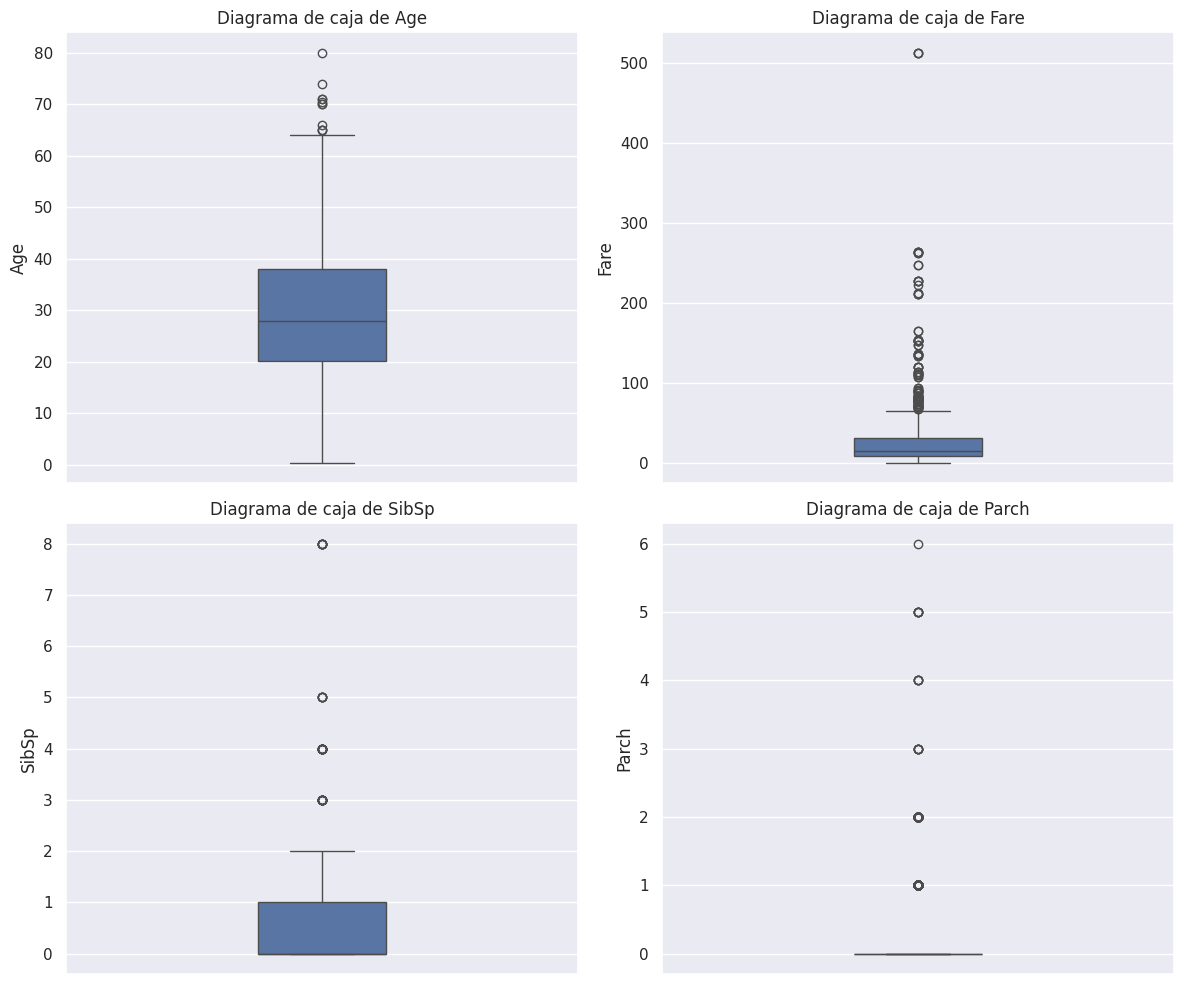

In [72]:
#Detección de posibles outliers

num_cols = ["Age", "Fare", "SibSp", "Parch"]
print(df[num_cols].describe())

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(
        df[col],
        ax=axes[idx],
        width=0.25
    )
    axes[idx].set_title(f'Diagrama de caja de {col}')

plt.tight_layout()
plt.show()

Reporte de outliers utilizando z-score

In [73]:
#Reporte de outliers utilizando z-score

num_cols = ["Age", "Fare", "SibSp", "Parch"]

def detect_outliers_zscore(df, column, threshold=3):

    series = df[column]
    valid_values = series.dropna()

    z_scores = np.abs(stats.zscore(valid_values))
    outliers = valid_values[z_scores > threshold]

    return outliers


def print_outliers_report(df, columns, threshold=3):

    print(f"\nReporte de outliers (Z-score > {threshold})\n")

    for col in columns:
        outliers = detect_outliers_zscore(df, col, threshold)
        print(f" {col}: {len(outliers)} outliers")


# Ejecución
threshold = 3
print_outliers_report(df, num_cols, threshold)


Reporte de outliers (Z-score > 3)

 Age: 2 outliers
 Fare: 20 outliers
 SibSp: 30 outliers
 Parch: 15 outliers


Análisis de supervivencia

Recuento de Survived:
Survived
0    549
1    342
Name: count, dtype: int64

Proporciones de Survived:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


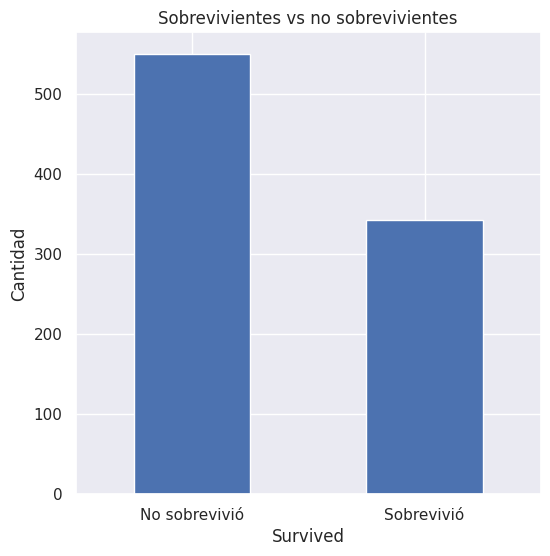

In [74]:
#Supervivencia global
surv_counts = df["Survived"].value_counts()
surv_props = df["Survived"].value_counts(normalize=True)

print("Recuento de Survived:")
print(surv_counts)
print("\nProporciones de Survived:")
print(surv_props)

plt.figure(figsize=(6,6))
surv_counts.plot(kind="bar")
plt.title("Sobrevivientes vs no sobrevivientes")
plt.xticks([0, 1], ["No sobrevivió", "Sobrevivió"], rotation=0)
plt.ylabel("Cantidad")
plt.show()

In [75]:
def survival_rate_by(column_name):
    """
    Devuelve la tasa de supervivencia media por categoría de la columna especificada.
    """
    return df.groupby(column_name, observed=False)["Survived"].mean().sort_values(ascending=False)

def survival_count_by(column_name):
    """
    Devuelve la supervivencia media por categoría de la columna especificada.
    """
    return df.groupby(column_name, observed=False)["Survived"].sort_values(ascending=False)

In [76]:
# Gráficos de supervivencia por categorías
def plot_survival_count(
    data,
    x_column: str,
    figsize=(6, 4),
    x_label: str | None = None,
    title: str | None = None,
) -> None:
    x_label = x_label or x_column
    if title is None:
        title = f"Supervivencia según {x_label.lower()} (recuento)"

    fig, ax = plt.subplots(figsize=figsize)

    sns.countplot(data=data, x=x_column, hue="Survived", ax=ax)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Cantidad")

    ax.legend(title="Supervivió", labels=["No", "Sí"])

    # Etiquetas numéricas sobre cada barra
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=10)

    fig.tight_layout()
    plt.show()


Tasa de supervivencia por Sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 



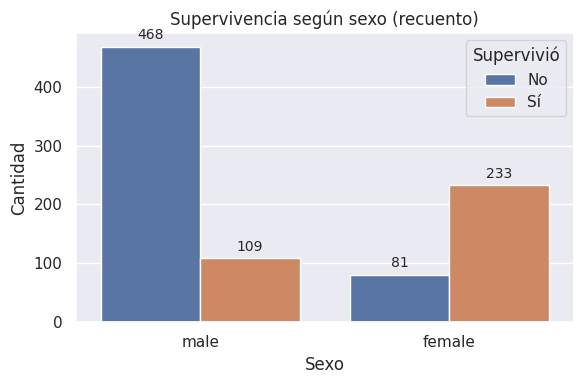

Tasa de supervivencia por Clase:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 



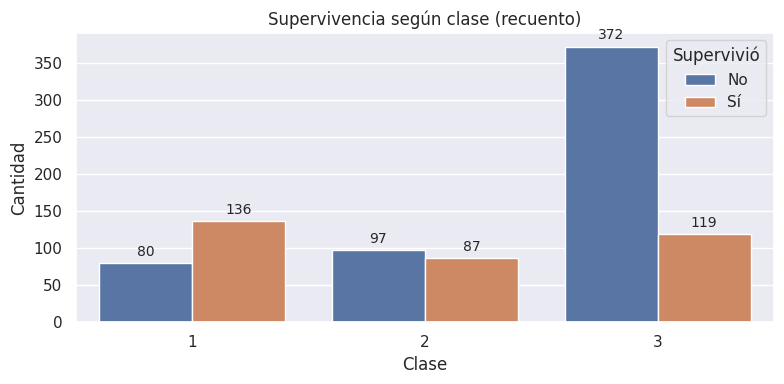

Tasa de supervivencia por puerto de embarque:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 



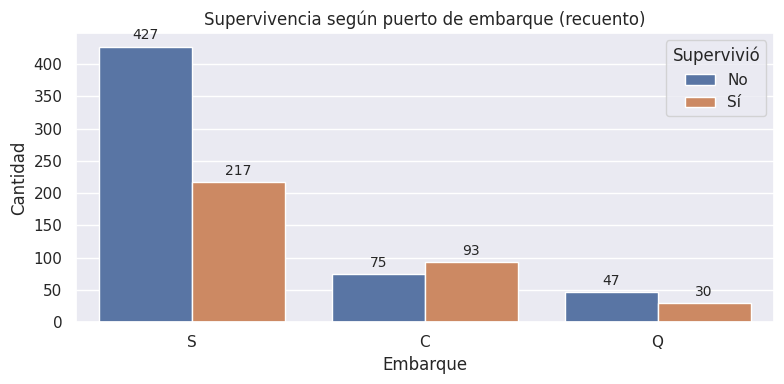

Tasa de supervivencia por número de hermanos/cónyuges a bordo:
SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64 



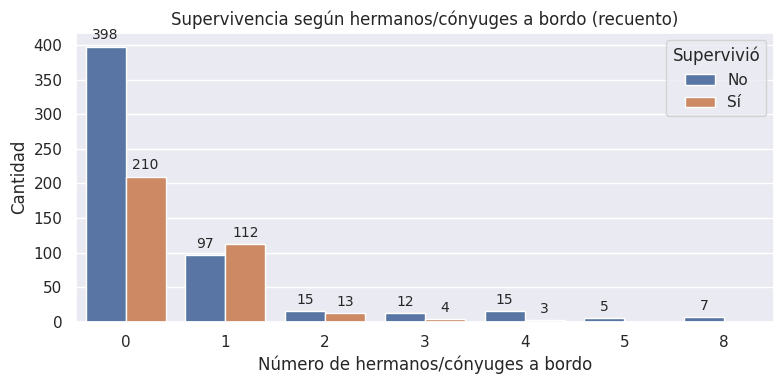

Tasa de supervivencia por número de padres/hijos a bordo:
Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64 



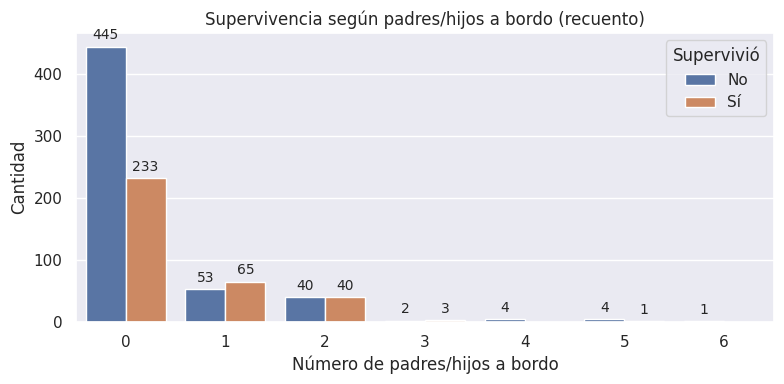

In [77]:
# 1) Supervivencia según sexo

print("\nTasa de supervivencia por Sexo:")
print(survival_rate_by("Sex"), "\n")


plot_survival_count(
    data=df,
    x_column="Sex",
    figsize=(6, 4),
    x_label="Sexo",
    title="Supervivencia según sexo (recuento)"
)

# 2) Supervivencia según clase
print("Tasa de supervivencia por Clase:")
print(survival_rate_by("Pclass"), "\n")

plot_survival_count(
    data=df,
    x_column="Pclass",
    figsize=(8, 4),
    x_label="Clase",
    title="Supervivencia según clase (recuento)"
)


# 3) Supervivencia según puerto de embarque
print("Tasa de supervivencia por puerto de embarque:")
print(survival_rate_by("Pclass"), "\n")

plot_survival_count(
    data=df,
    x_column="Embarked",
    figsize=(8, 4),
    x_label="Embarque",
    title="Supervivencia según puerto de embarque (recuento)"
)

# 4) Supervivencia según número de hermanos/cónyuges a bordo
print("Tasa de supervivencia por número de hermanos/cónyuges a bordo:")
print(survival_rate_by("SibSp"), "\n")

plot_survival_count(
    data=df,
    x_column="SibSp",
    figsize=(8, 4),
    x_label="Número de hermanos/cónyuges a bordo",
    title="Supervivencia según hermanos/cónyuges a bordo (recuento)"
)

# 5) Supervivencia según número de padres/hijos a bordo
print("Tasa de supervivencia por número de padres/hijos a bordo:")
print(survival_rate_by("Parch") , "\n")

plot_survival_count(
    data=df,
    x_column="Parch",
    figsize=(8, 4),
    x_label="Número de padres/hijos a bordo",
    title="Supervivencia según padres/hijos a bordo (recuento)"
)


Supervivencia por clase y sexo

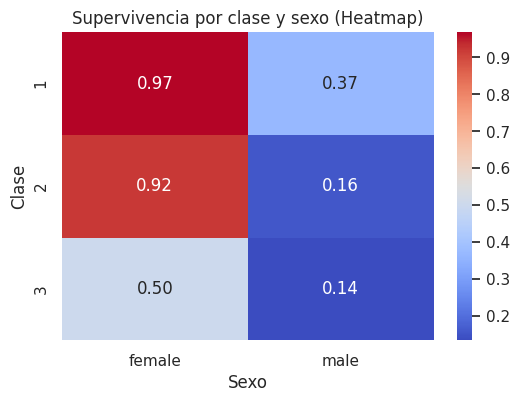

In [78]:
pivot = df.pivot_table(
    values="Survived",
    index="Pclass",
    columns="Sex",
    aggfunc="mean"
)

plt.figure(figsize=(6,4))
sns.heatmap(
    pivot, annot=True, cmap="coolwarm", fmt=".2f"
)

plt.title("Supervivencia por clase y sexo (Heatmap)")
plt.xlabel("Sexo")
plt.ylabel("Clase")
plt.show()

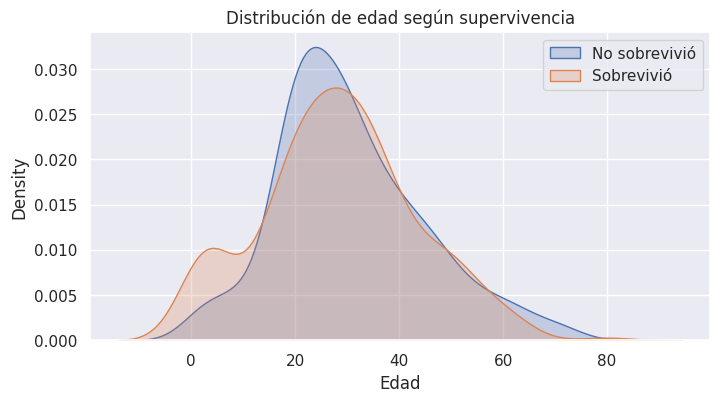

In [79]:
# Supervivencia según edad (distribuciones y grupos de edad)

# Distribución de edad según Survived (KDE)
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df["Survived"] == 0], x="Age", fill=True, label="No sobrevivió")
sns.kdeplot(data=df[df["Survived"] == 1], x="Age", fill=True, label="Sobrevivió")
plt.title("Distribución de edad según supervivencia")
plt.xlabel("Edad")
plt.legend()
plt.show()

In [80]:
# Crear tabla pivote con la tasa de supervivencia por AgeBin

print("Tasa de supervivencia por rango de edad:")
print(survival_rate_by("AgeBin"))

age_survival = df.pivot_table(
    values="Survived",
    index="AgeBin",
    aggfunc="mean",
    observed=False 
)

plt.figure(figsize=(6,4))
sns.heatmap(
    age_survival,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Tasa de supervivencia por grupo de edad")
plt.xlabel("")
plt.ylabel("Grupo de edad")
plt.show()



Tasa de supervivencia por rango de edad:


KeyError: 'AgeBin'

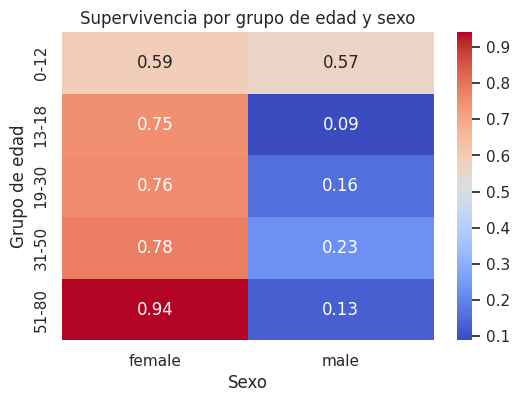

In [ ]:
age_sex = df.pivot_table(
    values="Survived",
    index="AgeBin",
    columns="Sex",
    aggfunc="mean",
    observed=False 

)

plt.figure(figsize=(6,4))
sns.heatmap(
    age_sex,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Supervivencia por grupo de edad y sexo")
plt.xlabel("Sexo")
plt.ylabel("Grupo de edad")
plt.show()


In [ ]:
print("\nTasa de supervivencia por grupo de edad:")
print(df.groupby("AgeBin", observed=False)["Survived"].mean())


Tasa de supervivencia por grupo de edad:
AgeBin
0-12     0.579710
13-18    0.428571
19-30    0.355556
31-50    0.423237
51-80    0.343750
Name: Survived, dtype: float64


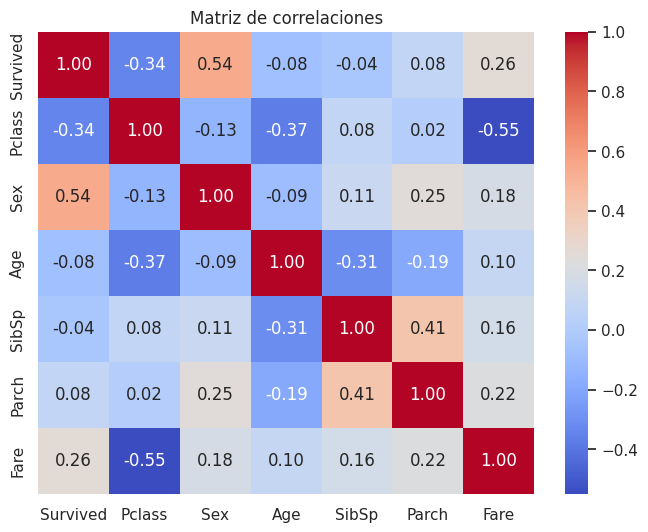

In [ ]:
# Copia del DataFrame para codificar variables
df_corr = df.copy()

# Codificar Sex como variable numérica
df_corr["Sex"] = df_corr["Sex"].map({"male": 0, "female": 1})

# Seleccionamos algunas columnas numéricas relevantes
corr_cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
corr_matrix = df_corr[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

In [ ]:
def plot_survival_count(
    data,
    x_column: str,
    figsize=(6, 4),
    x_label: str | None = None,
    title: str | None = None,
) -> None:
    x_label = x_label or x_column
    if title is None:
        title = f"Supervivencia según {x_label.lower()} (recuento)"

    fig, ax = plt.subplots(figsize=figsize)

    sns.countplot(data=data, x=x_column, hue="Survived", ax=ax)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Cantidad")

    ax.legend(title="Supervivió", labels=["No", "Sí"])

    # Etiquetas numéricas sobre cada barra
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=10)

    fig.tight_layout()
    plt.show()
